# Pymaceuticals Inc.
---

### Analysis

- The average Capomulin subject had more tumor volume early whereas the tumor volume was lesser as time went on. It is demonstrated in the line and bar plots.  Ramicane also seems to be a more successful treatment as shown by the bar chart.  

The heavier the mouse the greater the tumor volume was as well, shown in the scatter plots.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_study_results["Mouse ID"].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_study_results.groupby(["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mask = mouse_study_results["Mouse ID"]== "g989"
mouse_study_results.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask=mouse_study_results["Mouse ID"] != "g989"
mice_study_results = mouse_study_results.loc[mask].reset_index(drop=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_study_results["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
avg_tumor_vol = mice_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_tumor_vol =mice_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_vol=mice_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_vol=mice_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_vol=mice_study_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_vol_sum = pd.DataFrame({
    "Average":avg_tumor_vol,
    "Median":med_tumor_vol,
    "Variance":var_tumor_vol,
    "Standard Dev":std_tumor_vol,
    "SEM":sem_tumor_vol
})

tumor_vol_sum

,Average,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: title={'center': 'Rows Per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Row Counts'>

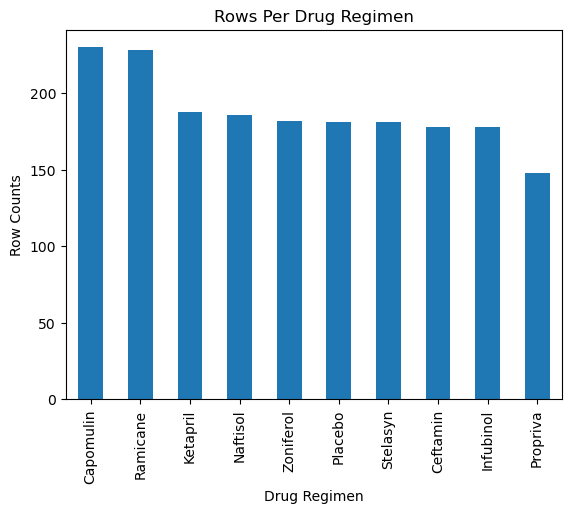

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_study_results.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Rows Per Drug Regimen", ylabel="Row Counts")

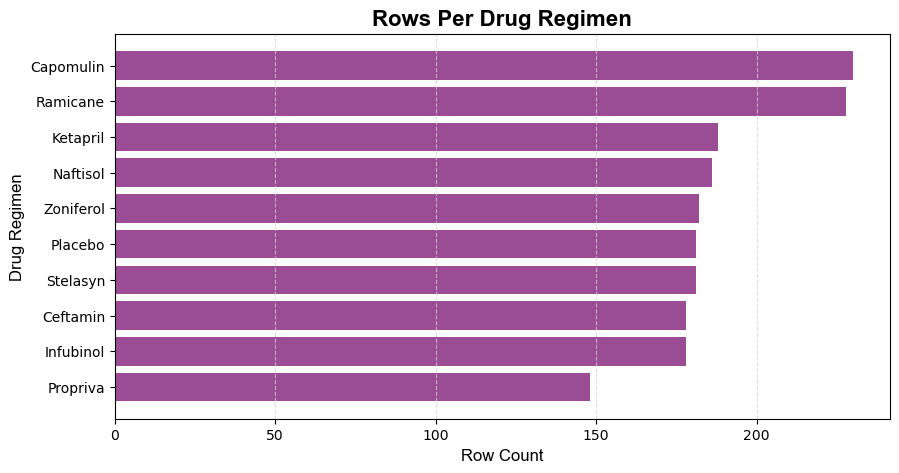

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Data Viz Recipe
data = mice_study_results["Drug Regimen"].value_counts().sort_values()

# Change Canvas Size
plt.figure(figsize=(10, 5))

# Create a basic plot
plt.barh(data.index, data.values, color="#9A4C95", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Row Count", fontfamily="Arial", fontsize=12)
plt.ylabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.title("Rows Per Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

<Axes: ylabel='count'>

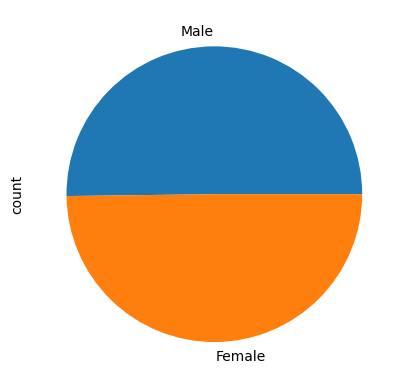

In [42]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex= mouse_study_results[["Mouse ID","Sex"]].drop_duplicates()
sex.shape
sexes = sex.Sex.value_counts()
# Make the pie chart
sexes.plot(kind ="pie", title = "Genders")

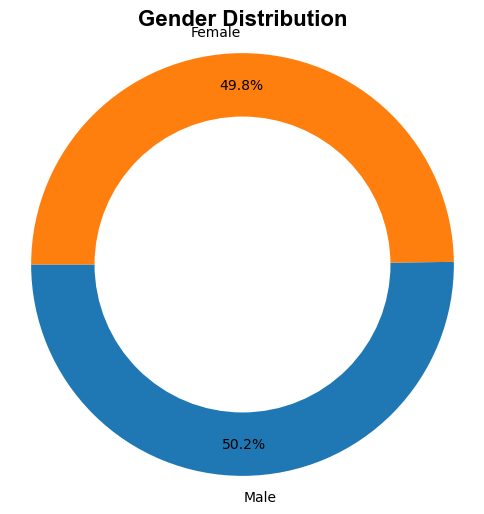

In [49]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
sexes = sex.Sex.value_counts()
    
    # Change Canvas Size
plt.figure(figsize=(6, 6))
    
    # Create a basic plot
plt.pie(sexes.values, labels=sexes.index, autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85)
    
    # Customizations
    # DONUT
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
plt.title(f"Gender Distribution", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Set X/Y Limits
plt.axis("equal")
    
    # Show/Save the Graph
plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint =mice_study_results.groupby("Mouse ID").Timepoint.max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_mice_time=pd.merge(max_timepoint, mice_study_results, on=["Mouse ID", "Timepoint"], how="left")
drug=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask=max_mice_time["Drug Regimen"].isin(drug)
max_mice_time =max_mice_time.loc[mask].reset_index(drop=True)
max_mice_time

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [76]:
# List of treatments
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data
tumor_vol_data = []

# Loop through each treatment to calculate IQR and find outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = max_mice_time.loc[max_mice_time['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Append the tumor volumes to the list
    tumor_vol_data.append({
        'Treatment': treatment,
        'Tumor Volumes': tumor_volumes.tolist(),
        'Outliers': outliers.tolist(),
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    })

# Convert the list to a DataFrame for easier analysis
outlier_results = pd.DataFrame(tumor_vol_data)

# Display the results
print(outlier_results)
print(outlier_results.dtypes)

   Treatment                                      Tumor Volumes      Outliers  \
0  Capomulin  [38.98287774, 38.93963263, 30.48598484, 37.074...            []   
1   Ramicane  [38.4076183, 43.0475426, 38.81036633, 32.97852...            []   
2  Infubinol  [67.97341878, 65.52574285, 57.03186187, 66.083...  [36.3213458]   
3   Ceftamin  [62.99935619, 45.0, 56.05774909, 55.74282869, ...            []   

   Lower Bound  Upper Bound  
0    20.704562    51.832015  
1    17.912664    54.306811  
2    36.832905    82.741446  
3    25.355450    87.666458  
Treatment         object
Tumor Volumes     object
Outliers          object
Lower Bound      float64
Upper Bound      float64
dtype: object


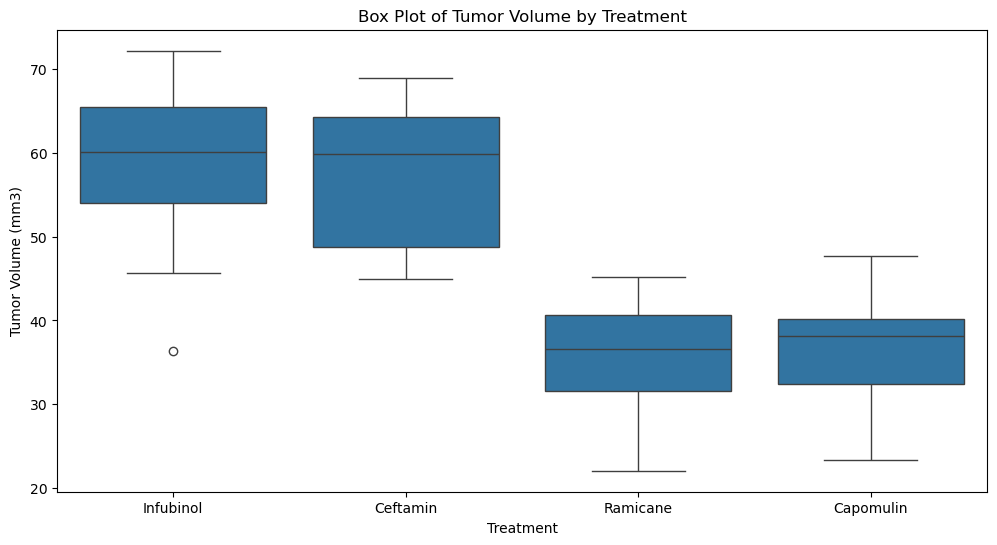

In [79]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Create a box plot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)',data=max_mice_time)

# Adding title and labels
plt.title('Box Plot of Tumor Volume by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

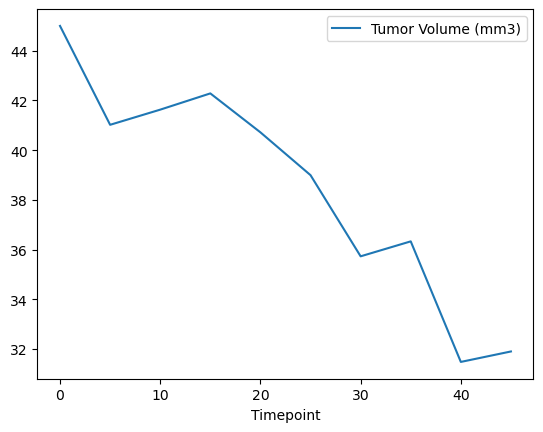

In [83]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse ="y793"
mouse_treatment = mice_study_results.loc[mice_study_results["Mouse ID"]==mouse]
mouse_treatment.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")

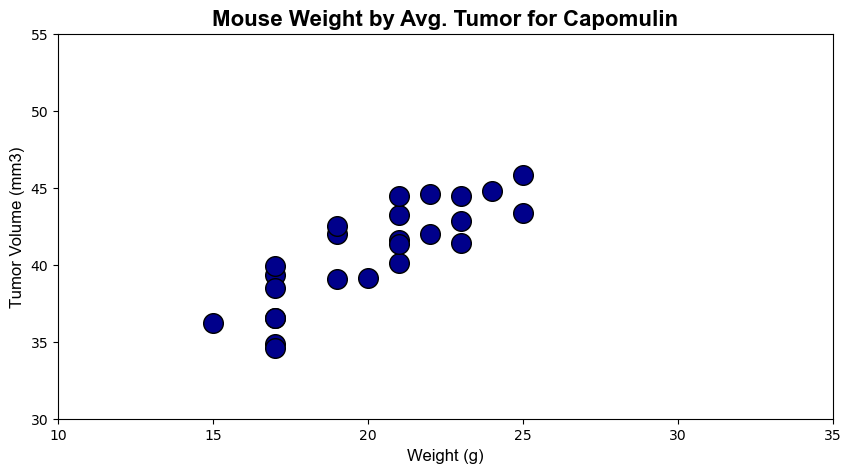

In [101]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug = "Capomulin"
drug_observed = mice_study_results.loc[mice_study_results["Drug Regimen"] == drug]
Weight_tumor_vol = drug_observed.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()

# Change Canvas Size
plt.figure(figsize=(10, 5))

# Create a basic plot
plt.scatter(Weight_tumor_vol["Weight (g)"], Weight_tumor_vol["Tumor Volume (mm3)"], color="darkblue", edgecolor="black", s=200) 

# Customizations
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Mouse Weight by Avg. Tumor for Capomulin", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(30, 55)
plt.xlim(10, 35)

# Show the plot
plt.show()


## Correlation and Regression

The correlation coefficient is 0.84
Slope: 0.9544396890241049, Intercept: 21.552160532685008, R-value: 0.8419363424694721, P-value: 1.3225722434712404e-07, Std Err: 0.12754359033201323


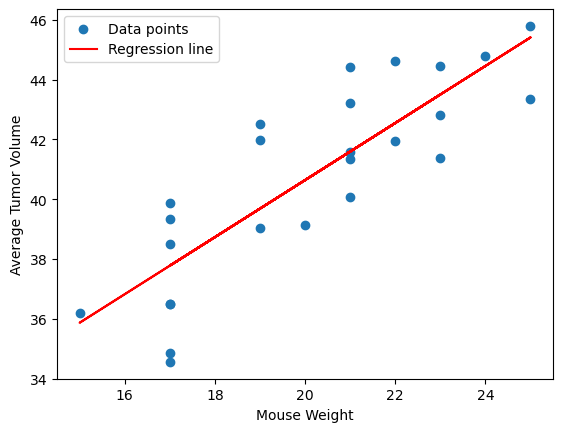

In [106]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

x = Weight_tumor_vol["Weight (g)"]
y = Weight_tumor_vol["Tumor Volume (mm3)"]

# Calculate the correlation coefficient
correlation = pearsonr(x, y)
print(f"The correlation coefficient is {round(correlation[0], 2)}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"Slope: {slope}, Intercept: {intercept}, R-value: {r_value}, P-value: {p_value}, Std Err: {std_err}")

# Create a scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(x, slope * np.array(x) + intercept, color='red', label='Regression line')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.legend()
plt.show()



